In [ ]:
import pandas as pd 
import seaborn as sns

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure

In [ ]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# Labelled Yelp Dataset.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('Labelled Yelp Dataset.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Labelled Yelp Dataset.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 6 columns


In [ ]:
df1

,User_id,Product_id,Rating,Date,Review,Label
0,923,0,3,12/8/2014,The food at snack is a selection of popular Gr...,-1
1,924,0,3,5/16/2013,This little place in Soho is wonderful. I had ...,-1
2,925,0,4,7/1/2013,ordered lunch for 15 from Snack last Friday. Â...,-1
3,926,0,4,7/28/2011,This is a beautiful quaint little restaurant o...,-1
4,927,0,4,11/1/2010,Snack is great place for a Â casual sit down l...,-1
...,...,...,...,...,...,...
995,1915,4,5,11/6/2011,Im not particularly fond of Murray Hill.. but ...,1
996,1916,4,4,10/28/2011,Who does not like shoe-string fries! ? Serious...,1
997,1917,4,4,10/28/2011,Cozy little French place that serves fantastic...,1
998,1918,4,3,10/20/2011,"So while I was waiting for our brunch table, I...",1


In [ ]:
df1.head(5)

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

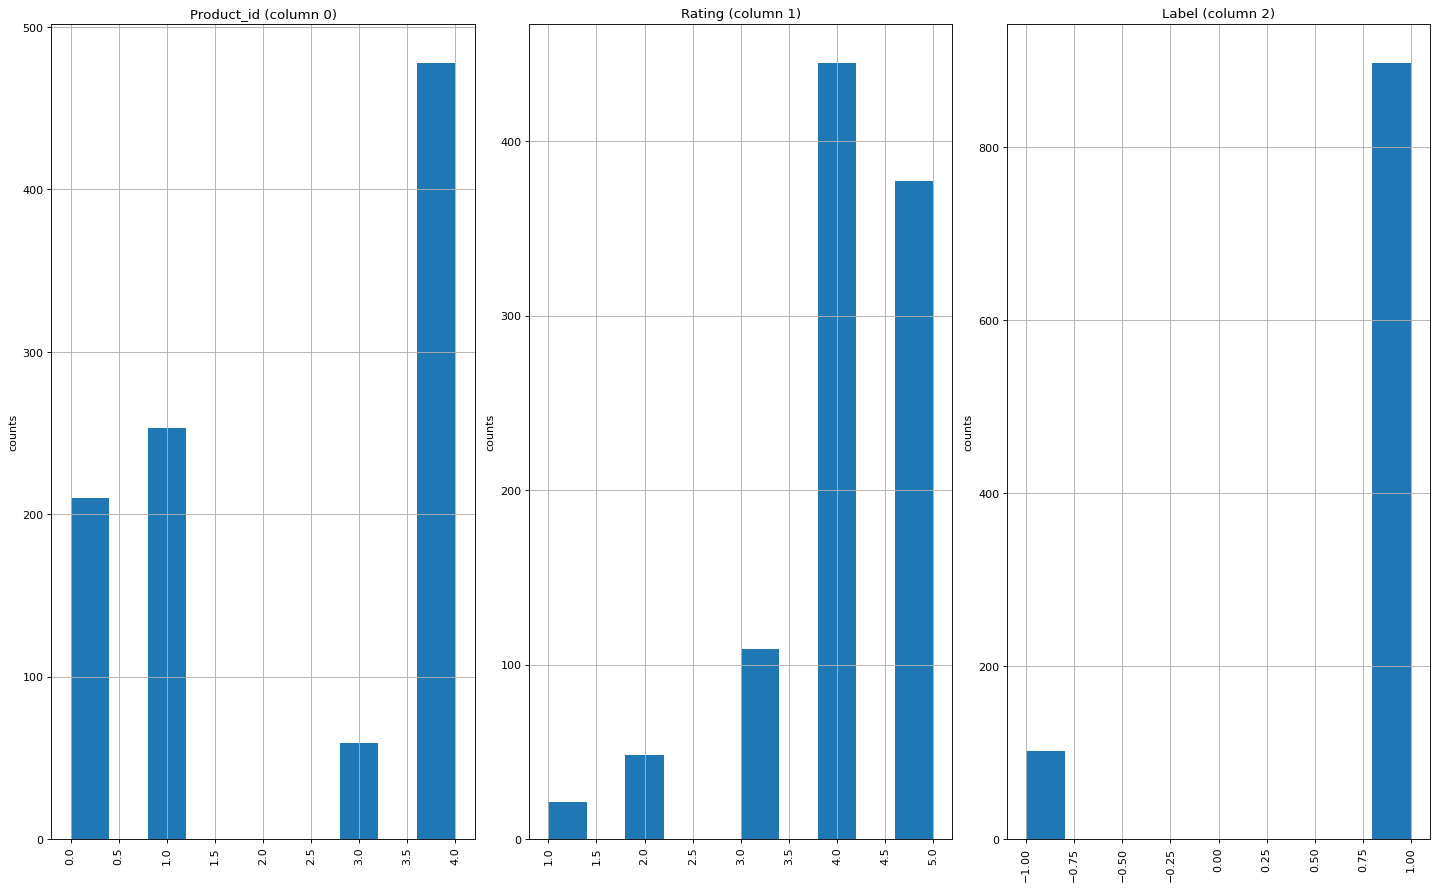

In [ ]:
plotPerColumnDistribution(df1, 10, 5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  after removing the cwd from sys.path.


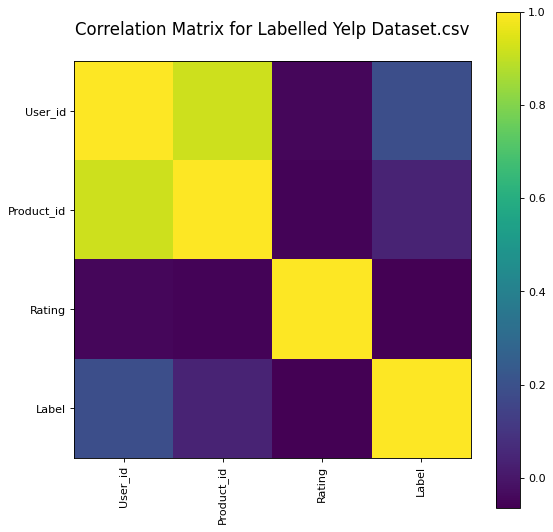

In [ ]:
plotCorrelationMatrix(df1, 8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


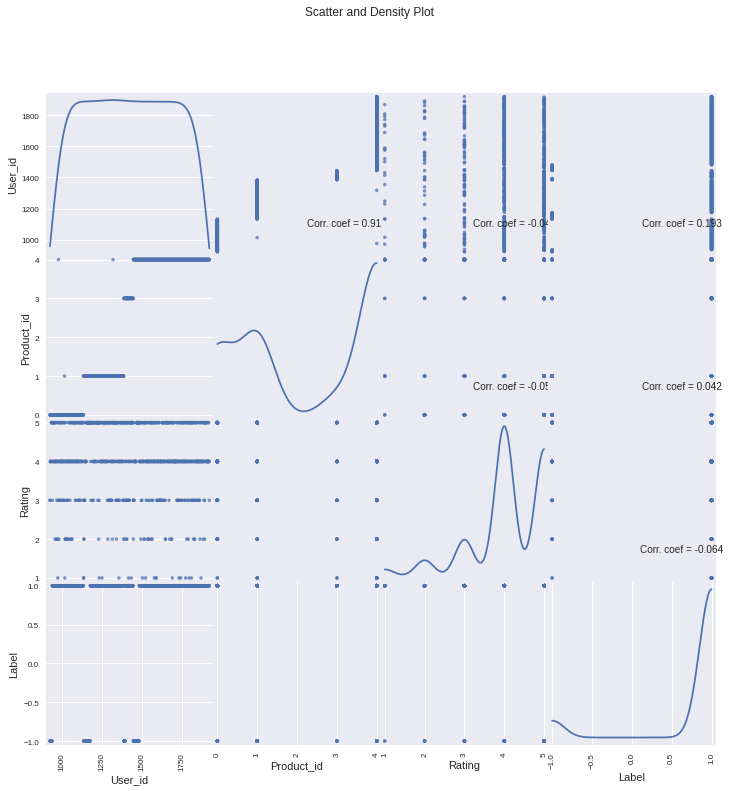

In [ ]:
plotScatterMatrix(df1, 12, 10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


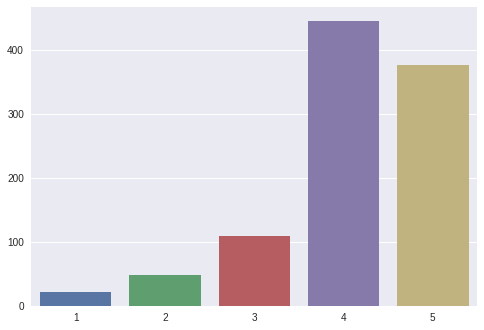

In [ ]:
cr=df1
y = cr.Rating.value_counts()
sns.barplot(y.index, y.values)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


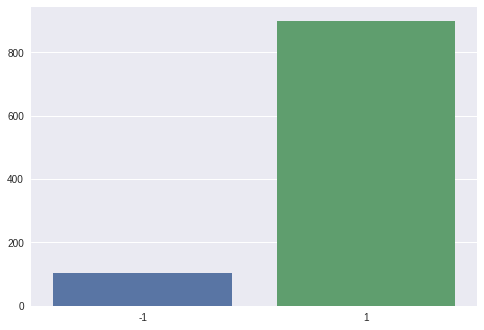

In [ ]:

y = cr.Label.value_counts()
sns.barplot(y.index, y.values)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


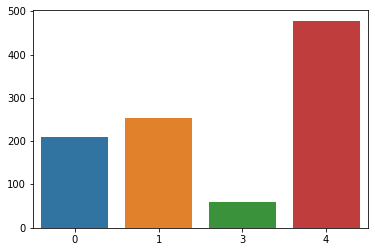

In [ ]:

y = cr.Product_id.value_counts()
sns.barplot(y.index, y.values)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


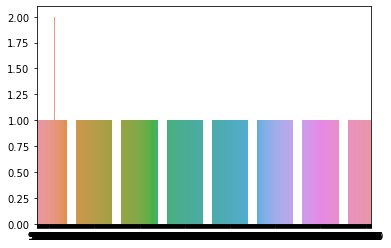

In [ ]:
y = cr.User_id.value_counts()
sns.barplot(y.index, y.values)

In [ ]:
df1.dtypes

User_id        int64
Product_id     int64
Rating         int64
Date          object
Review        object
Label          int64
dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df1.Review)

In [ ]:
cv.vocabulary_

{'the': 5577,
 'food': 2250,
 'at': 428,
 'snack': 5087,
 'is': 2997,
 'selection': 4887,
 'of': 3821,
 'popular': 4233,
 'greek': 2556,
 'dishes': 1681,
 'appetizer': 359,
 'tray': 5728,
 'good': 2506,
 'as': 406,
 'salad': 4751,
 'we': 6061,
 'were': 6088,
 'underwhelmed': 5828,
 'with': 6157,
 'main': 3362,
 'courses': 1344,
 'there': 5586,
 'are': 381,
 'tables': 5478,
 'here': 2724,
 'so': 5102,
 'it': 3006,
 'sometimes': 5136,
 'hard': 2649,
 'to': 5655,
 'get': 2445,
 'seated': 4861,
 'this': 5607,
 'little': 3272,
 'place': 4169,
 'in': 2906,
 'soho': 5117,
 'wonderful': 6174,
 'had': 2612,
 'lamb': 3141,
 'sandwich': 4773,
 'and': 302,
 'glass': 2479,
 'wine': 6139,
 'price': 4312,
 'shocked': 4960,
 'me': 3442,
 'for': 2256,
 'how': 2826,
 'small': 5066,
 'serving': 4916,
 'was': 6039,
 'but': 868,
 'then': 5584,
 'again': 207,
 'staff': 5260,
 'can': 905,
 'be': 556,
 'snotty': 5098,
 'rude': 4720,
 'great': 2552,
 'just': 3067,
 'don': 1722,
 'expect': 2031,
 'world': 6190,

In [ ]:
cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '02',
 '05',
 '07',
 '09',
 '10',
 '100',
 '10012',
 '10am',
 '10pm',
 '10th',
 '11',
 '110',
 '1130',
 '11pm',
 '12',
 '120',
 '1230',
 '12pm',
 '13',
 '14',
 '15',
 '150',
 '15min',
 '15pm',
 '16',
 '160',
 '17',
 '18',
 '19',
 '1hr',
 '1pm',
 '1st',
 '20',
 '200',
 '2007',
 '2008',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '208',
 '22',
 '22nd',
 '23',
 '24',
 '25',
 '250',
 '26',
 '27',
 '29',
 '2nd',
 '2pm',
 '30',
 '30minutes',
 '30p',
 '30pm',
 '31',
 '327',
 '33rd',
 '35',
 '36th',
 '38',
 '384',
 '39',
 '3pm',
 '3rd',
 '40',
 '4000',
 '41âº',
 '43',
 '45',
 '45min',
 '45pm',
 '49',
 '4th',
 '50',
 '500',
 '50th',
 '55th',
 '5th',
 '66',
 '6pm',
 '6th',
 '70',
 '71',
 '75',
 '7or',
 '7pm',
 '7th',
 '830',
 '8pm',
 '8ths',
 '90',
 '91',
 '93',
 '95',
 '99',
 'aaaaaalllllll',
 'ab',
 'aback',
 'abd',
 'aber',
 'abgelehnt',
 'abhor',
 'able',
 'abomination',
 'about',
 'above',
 'abrupt',
 'absent',
 'absolute',
 'absolutely',
 'absorbed',
 'abstractly',
 'absurdly',
 

In [ ]:
# Display one vector constructed with a message
X.toarray()[0]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X

<1000x6283 sparse matrix of type '<class 'numpy.int64'>'
	with 62655 stored elements in Compressed Sparse Row format>

In [ ]:
# Get the categories
y = df1.Label


In [ ]:
df1.dtypes

User_id        int64
Product_id     int64
Rating         int64
Date          object
Review        object
Label          int64
dtype: object

In [ ]:
df1.head()

,User_id,Product_id,Rating,Date,Review,Label
0,923,0,3,12/8/2014,The food at snack is a selection of popular Gr...,-1
1,924,0,3,5/16/2013,This little place in Soho is wonderful. I had ...,-1
2,925,0,4,7/1/2013,ordered lunch for 15 from Snack last Friday. Â...,-1
3,926,0,4,7/28/2011,This is a beautiful quaint little restaurant o...,-1
4,927,0,4,11/1/2010,Snack is great place for a Â casual sit down l...,-1


In [ ]:
y[:5]

0   -1
1   -1
2   -1
3   -1
4   -1
Name: Label, dtype: int64

In [ ]:
df1['date_day']=df1['Date'].str.split("/",n=2,expand = True)[0]
df1['date_month']=df1['Date'].str.split("/",n=2,expand = True)[1]
df1['date_year']=df1['Date'].str.split("/",n=2,expand = True)[2]

In [ ]:
df1

,User_id,Product_id,Rating,Date,Review,Label,date_day,date_month,date_year
0,923,0,3,12/8/2014,The food at snack is a selection of popular Gr...,-1,12,8,2014
1,924,0,3,5/16/2013,This little place in Soho is wonderful. I had ...,-1,5,16,2013
2,925,0,4,7/1/2013,ordered lunch for 15 from Snack last Friday. Â...,-1,7,1,2013
3,926,0,4,7/28/2011,This is a beautiful quaint little restaurant o...,-1,7,28,2011
4,927,0,4,11/1/2010,Snack is great place for a Â casual sit down l...,-1,11,1,2010
...,...,...,...,...,...,...,...,...,...
995,1915,4,5,11/6/2011,Im not particularly fond of Murray Hill.. but ...,1,11,6,2011
996,1916,4,4,10/28/2011,Who does not like shoe-string fries! ? Serious...,1,10,28,2011
997,1917,4,4,10/28/2011,Cozy little French place that serves fantastic...,1,10,28,2011
998,1918,4,3,10/20/2011,"So while I was waiting for our brunch table, I...",1,10,20,2011


In [ ]:
df1.drop(['Date'], axis=1 , inplace=True)

In [ ]:
df1

,User_id,Product_id,Rating,Review,Label,date_day,date_month,date_year
0,923,0,3,The food at snack is a selection of popular Gr...,-1,12,8,2014
1,924,0,3,This little place in Soho is wonderful. I had ...,-1,5,16,2013
2,925,0,4,ordered lunch for 15 from Snack last Friday. Â...,-1,7,1,2013
3,926,0,4,This is a beautiful quaint little restaurant o...,-1,7,28,2011
4,927,0,4,Snack is great place for a Â casual sit down l...,-1,11,1,2010
...,...,...,...,...,...,...,...,...
995,1915,4,5,Im not particularly fond of Murray Hill.. but ...,1,11,6,2011
996,1916,4,4,Who does not like shoe-string fries! ? Serious...,1,10,28,2011
997,1917,4,4,Cozy little French place that serves fantastic...,1,10,28,2011
998,1918,4,3,"So while I was waiting for our brunch table, I...",1,10,20,2011


In [ ]:
df1.dtypes

User_id        int64
Product_id     int64
Rating         int64
Review        object
Label          int64
date_day      object
date_month    object
date_year     object
dtype: object

In [ ]:
# Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Find the best hyperparameter with GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
parameters = {"alpha": [0.2,1,2,5,10], "fit_prior": [True, False]}

grid = GridSearchCV(MultinomialNB(), param_grid=parameters)
grid.fit(X_train,y_train)

# Create a DataFrame with the best Hyperparameters
pd.DataFrame(grid.cv_results_)[['params','mean_test_score']]\
                               .sort_values(by="mean_test_score", ascending=False)

,params,mean_test_score
4,"{'alpha': 2, 'fit_prior': True}",0.90000
5,"{'alpha': 2, 'fit_prior': False}",0.90000
6,"{'alpha': 5, 'fit_prior': True}",0.90000
8,"{'alpha': 10, 'fit_prior': True}",0.90000
2,"{'alpha': 1, 'fit_prior': True}",0.89875
7,"{'alpha': 5, 'fit_prior': False}",0.89875
9,"{'alpha': 10, 'fit_prior': False}",0.89875
3,"{'alpha': 1, 'fit_prior': False}",0.89500
0,"{'alpha': 0.2, 'fit_prior': True}",0.88375
1,"{'alpha': 0.2, 'fit_prior': False}",0.87625


In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.00258026, 0.00237288, 0.00214763, 0.00223083, 0.00227809,
        0.00222721, 0.0021759 , 0.00221386, 0.00218139, 0.00227275]),
 'mean_score_time': array([0.00056076, 0.00050125, 0.00048194, 0.00051923, 0.00049829,
        0.00049706, 0.00047479, 0.00049262, 0.00049038, 0.0005125 ]),
 'mean_test_score': array([0.88375, 0.87625, 0.89875, 0.895  , 0.9    , 0.9    , 0.9    ,
        0.89875, 0.9    , 0.89875]),
 'param_alpha': masked_array(data=[0.2, 0.2, 1, 1, 2, 2, 5, 5, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_fit_prior': masked_array(data=[True, False, True, False, True, False, True, False,
                    True, False],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.2, 'fit_prior'

In [ ]:
# Display the best hyperparameters
grid.best_params_

{'alpha': 2, 'fit_prior': True}

In [ ]:
from sklearn.naive_bayes import MultinomialNB
alpha, fit_prior = grid.best_params_['alpha'], grid.best_params_['fit_prior']
model = MultinomialNB(alpha = alpha)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print(f'Accuracy: {round(accuracy_score(y_test,y_pred),3)}\n')
print(classification_report(y_test,y_pred))

Accuracy: 0.895

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        21
           1       0.90      1.00      0.94       179

    accuracy                           0.90       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.80      0.90      0.85       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd 
import numpy as np
import nltk
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import  accuracy_score , confusion_matrix , plot_confusion_matrix ,  classification_report
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
style.use("seaborn")

In [ ]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
BOW = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
Text_BOW = BOW.fit_transform(df1["Review"])

In [ ]:
Text_BOW

<1000x6030 sparse matrix of type '<class 'numpy.int64'>'
	with 39713 stored elements in Compressed Sparse Row format>

In [ ]:
Label = LabelBinarizer().fit_transform(np.array(df1["Label"]))

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(Text_BOW , df1.Label , test_size = 0.25 , random_state = 42)

### USING SUPPORT VECTOR MACHINE CLASSIFICATION

SVC model accuracy :88.40%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


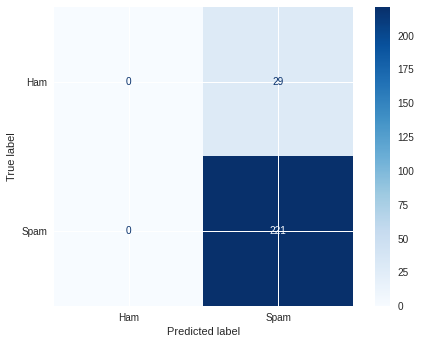

              precision    recall  f1-score   support

         Ham       0.00      0.00      0.00        29
        Spam       0.88      1.00      0.94       221

    accuracy                           0.88       250
   macro avg       0.44      0.50      0.47       250
weighted avg       0.78      0.88      0.83       250



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.svm import SVC
SVC_classifier = SVC().fit(X_train , y_train)
SVC_classifier_prediction = SVC_classifier.predict(X_test)
SVC_Acc = accuracy_score(y_test , SVC_classifier_prediction)*100
print(f"SVC model accuracy :{format(SVC_Acc ,'.2f')}%")

cm  = confusion_matrix(y_test , SVC_classifier_prediction)

disp = plot_confusion_matrix(SVC_classifier, X_test, y_test,
                             display_labels=["Ham" , "Spam"],
                             cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test ,SVC_classifier_prediction  , target_names = ["Ham" ,"Spam"]))

### USING K-NEATEST NEIGHBOR CLASSIFICATION

K-NEATEST NEIGHBOR model accuracy : 87.60%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


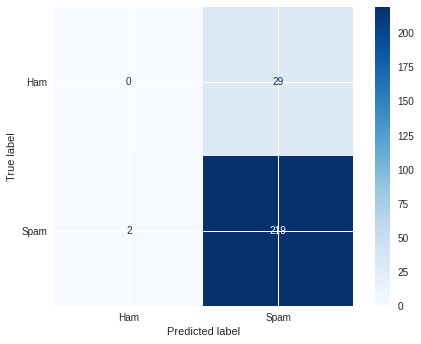

              precision    recall  f1-score   support

         Ham       0.00      0.00      0.00        29
        Spam       0.88      0.99      0.93       221

    accuracy                           0.88       250
   macro avg       0.44      0.50      0.47       250
weighted avg       0.78      0.88      0.83       250



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_CLASSIFICATION = KNeighborsClassifier(n_neighbors=3)
KNN_CLASSIFICATION.fit(X_train  , y_train)
KNN_CLASSIFICATION_Prediction= KNN_CLASSIFICATION.predict(X_test)
KNN_Acc = accuracy_score(y_test , KNN_CLASSIFICATION_Prediction)*100 
print(f"K-NEATEST NEIGHBOR model accuracy : {format(KNN_Acc , '.2f')}%")

cm  = confusion_matrix(y_test , KNN_CLASSIFICATION_Prediction)

disp = plot_confusion_matrix(KNN_CLASSIFICATION, X_test, y_test,
                             display_labels=["Ham" , "Spam"],
                             cmap=plt.cm.Blues)

plt.show()

print(classification_report(y_test ,KNN_CLASSIFICATION_Prediction  , target_names = ["Ham" ,"Spam"]))

### USING NAIVE BAYES CLASSIFICATION


NAIVE BAYES model accuracy : 86.80%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


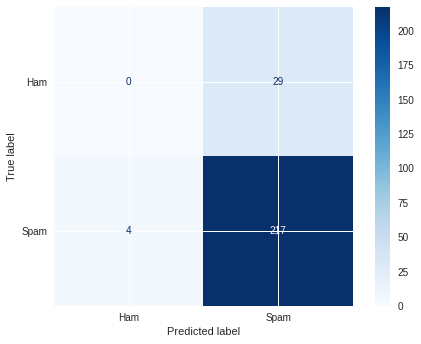

              precision    recall  f1-score   support

         Ham       0.00      0.00      0.00        29
        Spam       0.88      0.98      0.93       221

    accuracy                           0.87       250
   macro avg       0.44      0.49      0.46       250
weighted avg       0.78      0.87      0.82       250



In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB_Classification = MultinomialNB().fit(X_train , y_train)
NB_Classification_Prediction = NB_Classification.predict(X_test)
NB_Acc = accuracy_score(y_test , NB_Classification_Prediction)*100 
print(f"NAIVE BAYES model accuracy : {format(NB_Acc, '.2f')}%")

cm  = confusion_matrix(y_test , NB_Classification_Prediction)

disp = plot_confusion_matrix(NB_Classification, X_test, y_test,
                             display_labels=["Ham" , "Spam"],
                             cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test ,NB_Classification_Prediction  , target_names = ["Ham" ,"Spam"]))

### LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

LR_Classification = LogisticRegressionCV().fit(X_train , y_train)

LR_Classification_Prediction = LR_Classification.predict(X_test)

LR_Acc = accuracy_score(y_test ,LR_Classification_Prediction)*100 

print(f"LOGISITC REGRESSION model accuracy : {format(LR_Acc, '.2f')} %")

cm = confusion_matrix(y_test , LR_Classification_Prediction)

dict = plot_confusion_matrix(LR_Classification, X_test , y_test , display_labels = ["Ham" , "Spam"] , cmap = plt.cm.Blues)
plt.show()

print(classification_report(y_test ,LR_Classification_Prediction  , target_names = ["Ham" ,"Spam"]))

NameError: ignored

COMPARISION

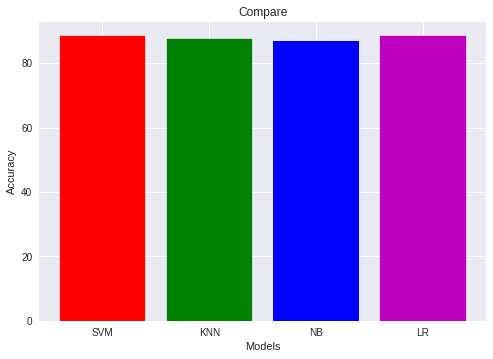

In [ ]:
models = ['SVM','KNN','NB','LR']  
acc = [SVC_Acc,KNN_Acc,NB_Acc,LR_Acc]  
barlist=plt.bar(models,acc,color = 'blue')  
barlist[0].set_color('r')
barlist[1].set_color('g')
barlist[3].set_color('m')
plt.title('Compare')  
plt.xlabel('Models')  
plt.ylabel('Accuracy')  
plt.show() 

In [ ]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
BOW = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
Text_BOW = BOW.fit_transform(df1["Review"])

In [ ]:
SVC_classifier_prediction = SVC_classifier.predict(Text_BOW)

In [ ]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
BOW = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
Text_BOW = BOW.fit_transform(["this is product is so good"])

In [ ]:
SVC_classifier_prediction = SVC_classifier.predict(X_test)